# Eli Boahen | The sentiments of Students Towards AI
== 2023 Fall ===

Prof. Omer Yalcin

DACSS 690P

Final Project

# Introduction 📎
My focus for my master's dgree has been on Technoliteracy and its effects. This includes societal, wellness, and political impacts on individuals and the systems themselves.

Access to technology and technological know-how can not only be a means of power, but also survival. If one does not have an email address, there is a plethora of services they cannot access. Speaking to you directly: imagine having no concept of an email address and yet still being expected to not only have one but also know how to get one, how to choose a good username that won't go to spam, how to have good email etiquette, etc. Email is just one technological system that tethers daily life.

> Over the course of 3 years alone, AI has gone from a science fiction concept, to a technological tool students use and teachers screen for. So, what do the students think about AI?

Students have used AI tools for drafting papers, answering coding questions, and even language exchange. What is their sentiment towards AI? This project will look at 3 main themes: AI, Technoliteracy, and Sentiment Analysis.

Here we go



### **My Questions**
1.   What are students' sentiments towards AI?
2.   What are students' sentiments towards AI in education?

In [ ]:
#-- RUN ME FIRST ----#
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium


In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Collection 💻
### **Choosing the data**
I searched for data relating to `ai`, `robots`, `feelings`, `sentiment`, `wellbeing`, and `technology`. I wanted a dataset that was on theme and allowed me to explore my research interests in a new way.

After exploring all the resources provided in the instructions—thank you!—I a lot of interesting research. Yet, despite the cool information, often the material I was interested in either required access requests, or were a lot to wrangle in the long run.

This dataset, `🤖 Students' Perceptions of AI in Education`, was chosen as it was 1) straightforward 2) directly related and 3) because of the stories that can be told with it.

The data is also very numerical for a sentiment analysis, so I look forward to applying quantitative knowledge from 603 to this assignment in Python.

I had considered doing a web scrape, but for the sake of *completing* this project, I had to dial things back. Stay tuned for future work!


### **Where did you get the data ?**
I retrieved this data from [Kaggle](https://www.kaggle.com/datasets/gianinamariapetrascu/survey-on-students-perceptions-of-ai-in-education/).

It is available to download publicly.

### **Why this topic ?**
My interest in Technoliteracy stems from my own experiences as both a technology learner and as an educator. I was truly blessed to have learned about HTML at about 11 years old, and am honored that I have had the opportunity to spark student interest over the past 7 or so years. I have seen how even the surface level concepts of computational thinking can really change a student's mindset on life. Expanding into the Social Sciences, technoliteracy can determine so much of one's life. Algorithms have been used to determine the social welfare from screening "scammers" to policing, phishing scams often target those in need or with lower than societally expected technoliteracy.

I am exploring Technoliteracy because I know technology education is powerful. In this project, I want to see what the current learners think.


In [4]:
import requests
url = "https://www.kaggle.com/datasets/gianinamariapetrascu/survey-on-students-perceptions-of-ai-in-education/"

data = requests.get(url)
data.status_code

200

In [5]:
#-- You can also selenium it ----#
from selenium import webdriver
import webbrowser

webbrowser.open(url, new=0, autoraise=True)

False

# Wrangling 🤠

Howdy! Here is how I wrangled my data all together.

First, let's read in our data.

In [6]:
pd.read_csv("/content/Survey_AI.csv")

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,8,Internet,1,0,0,0,0,1,1,...,7,2,2,1,1,2,1,1,1,7.2
87,88,6,Social media,0,0,1,0,0,2,2,...,7,3,1,3,2,2,1,3,1,8.7
88,89,9,Books/Scientific papers (physical/online format),0,1,0,0,0,1,1,...,10,1,2,3,1,2,1,1,0,6.2
89,90,2,I don't inform myself about AI,0,0,0,0,1,2,4,...,2,2,3,1,2,2,1,1,1,8.7


### **Data Description**
Our survey data is collected in 4 different ways: scalar, text, multiple choice, and binary questions.

This I found really cool: Looking at column 3, `Q2.AI_sources` it seems this question was multiple choice with checkboxes, and the data in that column includes all choices participants selected. However, in columns 4 to 8, we see those same options but as true, `1`, or false, `0`.

Participants are asked a number of questions including their feelings towards AI from a selection of options, what industries do they feel AI will impact, as well as demographic information about them such as their age, gender, GPA, and major.

I think the number of demographic points is interesting—especially reflecting on the feedback I received during the poster session on the 11th—however, I feel that there are only so many individuals of x-gender with x-GPA in x-major who did not pass all of their exams, see the column `Q15.Passed_exams`. I may explore demographic data later, but this does bring up privacy concerns.

### Round 1: What Bubbles up?
With my first overview of the data done, there are a few things I found interesting:
1.   The breakdown of `Q2`
2.   There is section that directly asks students how they feel. I would love to look more are that
3. `Q7` through `Q11` Look interesting, and if I can, I would like to look at this section as a regression.

The whole entire dataset looks interesting, and I could pull really interesting insights from it. Let's  focus on `Q2` Where students learn about AI, `Q5`How do they feel about AI, and `Q7`, Scalar: how useful do participants think AI will be in education.

### Round 2: `Q2` Knowledge Sources
First, I looked at `Q2` filtering down to only the relevant columns.

Next, I added up all of the "sources" scores, creating `Total_Sources`.

Lastly, I created a dataframe just of the sources. In this, I omitted the `Q2#5.NotInformed` column because my aim was to compare the knowledge sources, so the un-informed population isn't needed for that dataframe.

Overall, I created 3 dataframes for `Q2`: one solely made up of `Q2` data, one I can use to compare the number of informed vs uninformed students, and one to compare the most popular sources amongst participants.


In [57]:
'''Here we're looking just at Q2 data'''
# Each question needed a lot of work so I I slit them intoe seperate chunks

#-- Our Data ------#
df = pd.read_csv("/content/Survey_AI.csv")
#print(df.shape) # 91 rows, 35 columns

#-- Q2: Where did you learn about AI ------#
df_q2 = df[['Q2.AI_sources','Q2#1.Internet', 'Q2#2.Books/Papers','Q2#3.Social_media','Q2#4.Discussions', 'Q2#5.NotInformed']]
#print(df_q2) # check
#------------------------------------------#
#-- Shows us the total number of sources each particpant used to learn about AI ------#
df_q2['Total_Sources'] = df_q2[['Q2#1.Internet', 'Q2#2.Books/Papers','Q2#3.Social_media','Q2#4.Discussions']].sum(axis=1)
#print(df_q2) # check
#-------------------------------------------------------------------------------------#
#-- Total number of Informed vs Uninformed ------#
informed_ = 0
informed_ = [informed_ +1 for ind,row in df_q2.iterrows() if row['Total_Sources'] >=1]
#print(informed_) # Not what I was expecting but I can still work with this
informed = len(informed_)
#print(informed) # check

uninformed_ = 0
uninformed_ = [uninformed_ +1 for ind,row in df_q2.iterrows() if row['Q2#5.NotInformed'] >=1]
#print(uninformed_) # Okay the same logic is working
uninformed = len(uninformed_)
#print(uninformed) # check

# Creating a dataframe of Informed x Uninformed
data_informed_un = [['Informed',informed],['Uninformed',uninformed]]
df_q2_informed_un = pd.DataFrame(data_informed_un, columns =['Status','count'])
#print(df_q2_informed_un) #BEAUTIFUL
#-----------------------------------------------#
#-- Creates a df of just the learning sources ------#
df_q2_sources = df[['Q2#1.Internet', 'Q2#2.Books/Papers','Q2#3.Social_media','Q2#4.Discussions']]
print(df_q2_sources)
# Good for bar graphs
#------------------------------------------#

    Q2#1.Internet  Q2#2.Books/Papers  Q2#3.Social_media  Q2#4.Discussions
0               1                  1                  0                 0
1               1                  0                  1                 0
2               1                  1                  0                 0
3               1                  0                  1                 0
4               1                  0                  0                 0
..            ...                ...                ...               ...
86              1                  0                  0                 0
87              0                  0                  1                 0
88              0                  1                  0                 0
89              0                  0                  0                 0
90              0                  0                  0                 1

[91 rows x 4 columns]


<ipython-input-57-4529474f314d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q2['Total_Sources'] = df_q2[['Q2#1.Internet', 'Q2#2.Books/Papers','Q2#3.Social_media','Q2#4.Discussions']].sum(axis=1)


### Round 3: `Q5` Feelings on AI
At first, I thought `Q5` would be a straight forward path—manipulate the data so I can create a bar graph. I was very wrong.

`Q5` is not text data. The data in this column is all numbers used to represent each option: `1` = Curiosity, `2` = Fear, `3` = Indifference, and `4` = Trust.

My original thought was to borrow the logic I used in `Q2`; to create long data for `Q5`. I planned to first create a new data frame just for `Q5`, mostly for my own sanity. Then, I would loop through that column 4 times, one for each option, setting a variable equal to each instance of `1`, `2`, `3`, and `4`. However, with a simple `countplot` all of that logic can be done for me. See more in the *Visualization* section.


In [58]:
'''Q5 data'''

#-- Our Data ------#
df = pd.read_csv("/content/Survey_AI.csv")
#print(df.shape) # 91 rows, 35 columns

#-- Q5: When you think about AI do you feel: ------#
df_q5 = df[['Q5.Feelings']]
#print(df_q5) # check
#--------------------------------------------------#


### Round 4: `Q7` & `Q14` *Who* finds AI useful ?
Initially, I planned to compare `Q7` with the results of questions 8 through 11, however, I found an interesting question I can explore:
> Which majors found AI useful in the educational process?

First, I will make a dataframe of `Q7` and `Q14`. Similar to `Q5`, the majors are numerical as `1` = Economic Cybernetics, `2` = Statistics and Economic Forecasting, and `3` = Economic Informatics. These can be renamed in the *Visualization* section.


In [69]:
''' Comparing majors to opions on AI '''
#-- Q7 & Q14 dataframw ------#
df_q7_14 = df[['Q7.Utility_grade','Q14.Major']]
df_q7_14 = df_q7_14.rename(columns = {'Q7.Utility_grade':'Usefulness ( Scale from 1 - 10 )', 'Q14.Major':'Majors'})
print(df_q7_14) # check
#------------------------------------------#

    Usefulness ( Scale from 1 - 10 )  Majors
0                                  9       2
1                                  6       2
2                                  6       2
3                                  9       2
4                                  8       2
..                               ...     ...
86                                 7       1
87                                 7       3
88                                10       1
89                                 2       1
90                                 2       3

[91 rows x 2 columns]


# Visualizations 🎨

Now, with our wrangling cowboy hats off, it is time to visualize our data.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

### `Q2` Visualizations

This section will have 3 plots answering 3 questions:


1.   What is the number of informed vs uninformed participants?
2.   What is the number of sources participants use to stay informed?
3. What are the top sources participants use?



For the first question, I used a barplot. It is an easy way to compare our two metrics `informed` and `uninformed`.

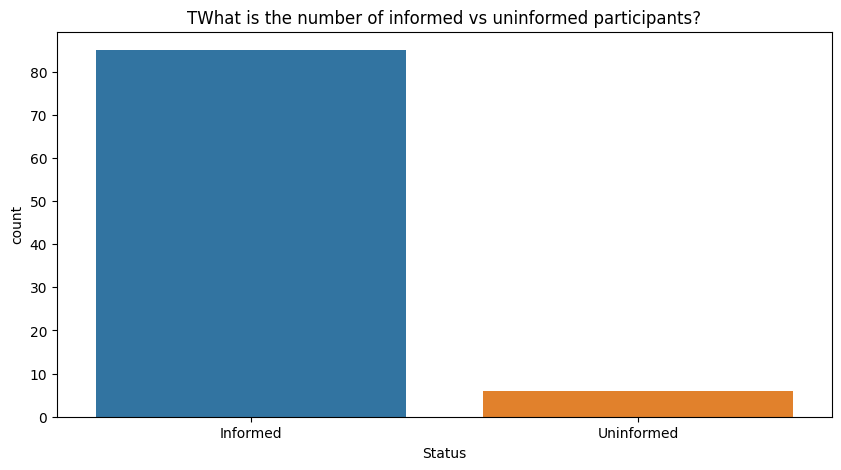

In [82]:
'''1) What is the number of informed vs uninformed participants?'''
plt.figure(figsize=(10,5))
q2_plot_informed_un = sns.barplot(x='Status', y = 'count', data = df_q2_informed_un).set(title='What is the number of informed vs uninformed participants?')

The second question was a fun one. Though I could have done another `barplot` I wanted to explore using distribution.

In [ ]:
'''2) What is the number of sources participants use to stay informed?'''
q2_plot_num_sources = sns.distplot(df_q2['Total_Sources'], kde = True)

#q2_plot_num_sources = sns.histplot(df_q2['Total_Sources']) # First look at the data
# OF NOTE:
#<ipython-input-45-eb71a4353f66>:2: UserWarning:
#
#`distplot` is a deprecated function and will be removed in seaborn v0.14.0.
#
#Please adapt your code to use either `displot` (a figure-level function with
#similar flexibility) or `histplot` (an axes-level function for histograms).
#
#For a guide to updating your code to use the new functions, please see
#https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
#
#  q2_plot_num_sources = sns.distplot(df_q2['Total_Sources'])

Lasty, for the third question, I went back to barplots.

In [ ]:
'''3) What are the top sources participants use?'''
q2_sources_col_labels =['Internet', 'Books / Papers', 'Scoial Media', 'Discussions']

plt.figure(figsize=(10,5))
q2_plot_sources = sns.barplot(df_q2_sources)
q2_plot_sources.set_xticklabels(q2_sources_col_labels)

### `Q5` Visualizations

This section will have just 1 plot visualizing the feelings participants had towards AI.

If you remember back in the wrangling section, I mentioned `countplot` doing the logic for me. Here, each instance of `1`,`2`,`3`, and `4` is counted. Then, I renamed each x-value after it's resepective term.

In [ ]:
q5_col_labels =['Curiosity', 'Fear', 'Indifference', 'Trust']

plt.figure(figsize=(10,5))
q5_plot = sns.countplot(x='Q5.Feelings', data = df_q5)
q5_plot.set_xticklabels(q5_col_labels)

### `Q7` & `Q14` Visualizations

This section will also have just 1 plot visualizing the relationship between participant major and perceived usefulness of AI in the educational process.

Boxplots became a new favoite this semster. They can show a lot of information is a condensed format that is easy to interpret in a few glances.

[(0.0, 11.0)]

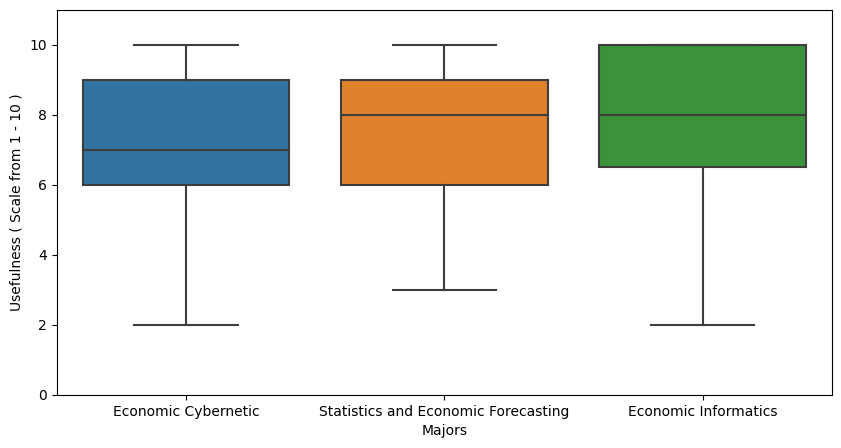

In [78]:
q7_14_col_labels =['Economic Cybernetic', 'Statistics and Economic Forecasting', 'Economic Informatics']
plt.figure(figsize=(10,5))
q7_14_plot = sns.boxplot(x='Majors', y = 'Usefulness ( Scale from 1 - 10 )', data = df_q7_14)
q7_14_plot.set_xticklabels(q7_14_col_labels)
q7_14_plot.set(ylim=(0,11))

# Analysis ⚡
*What does this all mean?*

In a survey of 91 undergraduate students attending the Faculty of Cybernetics, Statistics and Economic Informatics, we can see the following:

### `Q2` Analysis
Most frequently, participants had just 1 source where they learn about AI, with 2 and 3 sources behind that. Even with the ability to select multiple options, the `Internet` and `Social Media` were the most popular sources while `Discussions` were the least popular source of AI knowledge.

### `Q5` Analysis
Overall, participants were curious about AI that anything else. `Curiosity` had a significantly higher selection rate, breaking 60, while the other options were below 20. Amongst the other options however, `Fear` was higher than `Trust` but more participants felt `Indifference` towards AI rather than `Trust`.

### `Q7` & `Q14` Analysis
This was a great example of how, even with the same data, looking at a spreadsheet is wildly different from looking at a visualization. I did not realize how economics focused the majors were until I plotted the data. Of the 3 majors represented in the data, `Statistics and Economic Forecasting` had a range of 3 to 10, while `Economic Cybernetic` and `Economic Informatics` majors ranged from 2 to 10. Despite this fact, `Statistics and Economic Forecasting` and `Economic Informatics` had the same median.

### **Re-visiting My Questions**
1.   What are students' sentiments towards AI?
2.   What are students' sentiments towards AI in education?

Students are curious about AI; they are significantly more curious than fearful. Most believe AI will be useful in the educational process, though forecasting majors seem to be more optimistic.

These sentiments towards AI may be influenced by their sources of AI education. Most participants ascertained their knowledge through the `Internet` and `Social Media` which have a range of opinions on AI, versus discussion and papers which tend to look at AI with an academic critical lens.


# Conclusion 📁
AI is a big topic, but its popularity at the moment may also be its downfall. Adoption without education seems improbably—how can someone be onboarded to a tool without knowing it—and yet it is happening across industry with AI. Through looking at sentiments, we can gain a grasp on the true reality of a technology post presentation, reveal, or launch party.

I hope my analysis was able to give a peak into the world of Technoliteracy in relation to AI.


# Code Graveyard 👻

The Code Graveyard is a holding post for the ghosts of code's past (i.e. all the code that failed or I ultimately couldn't use). This is something I've done across assignments. I think it's not only helpful, but important to look at the failures along the way that got us to our final successes.

In my own tech journey, I have had a lot of challenges coding. That is one of the many reasons why technoliteracy means so much to me. Throughout this final project, I looked back at old code, notes from office hours, and remembered *how* to ask questions when I looked things up. In a weird twist, there isn't that much in my final graveyard. I believe that's due to my previous graveyards. In an unexpected moment of reflection during this project, I feel a bit proud of the obsticles overcome in my own technology education. I hope I get to do this more, and make more graveyards.

Best wishes,
Eli

In [ ]:
#-- From Q2 Wrangling ------#
#for known in Total

# Created a 1D, pratically a list that was unplotable
#data_informed_un = [[informed,uninformed]]
#df_q2_informed_un = pd.DataFrame(data_informed_un, columns =['Informed','Uninformed'])
#print(df_q2_informed_un) #BEAUTIFUL
#df_q2_informed_un = df_q2_informed_un.rename(index = {0:'count'})
#print(df_q2_informed_un)

#-- From plotting Q2 ------#
#print(df_q2_informed_un)
#q2_plot = df_q2_informed_un.transpose
#print(q2_plot)

#-- Total number of Each Feeling ------#
# Reminder: `1` = Curiosity, `2` = Fear, `3` = Indifference, and `4` = Trust.
#curiosity_ = 0
#curiosity_ = [curiosity_ +1 for ind,row in df_q5.iterrows() if row['Q5.Feelings'] =1]
#print(curiosity_) # check
#curiosity = len(curiosity_)
#print(curiosity) # check

#fear_ = 0
#fear_ = [fear_ +1 for ind,row in df_q5.iterrows() if row['Q5.Feelings'] =2]
#print(fear_)  # check
#fear = len(fear_)
#print(fear) # check

#indifference_ = 0
#indifference_ = [indifference_ +1 for ind,row in df_q5.iterrows() if row['Q5.Feelings'] =1]
#print(indifference_) # check
#indifference = len(indifference_)
#print(indifference) # check

#trust_ = 0
#trust_ = [trust_ +1 for ind,row in df_q5.iterrows() if row['Q5.Feelings'] =2]
#print(trust_)  # check
#trust = len(trust_)
#print(trust) # check


# Creating a dataframe of Informed x Uninformed
#data_feelings = [[curiosity, fear, indifference, trust]]
#df_q5_feelings = pd.DataFrame(data_feelings, columns =['Curiosity', 'Fear', 'Indifference', 'Trust'])
#print(df_q5_feelings) #check
#-----------------------------------------------#
